In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Basic statistic

In [4]:
# 📥 Load Data
with open('C:/Users/DELL/Tiki_ABSA/src/models/DistilBert/data/v2_labeled_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
print(f"Total samples: {len(data)}")

Total samples: 4039


In [5]:
print(type(data))

<class 'list'>


In [6]:
# 📊 Extract Labels
records = []
for entry in data:
    text = entry['text']
    for label in entry['labels']:
        aspect, sentiment = label[3].split('#') if '#' in label[3] else (label[3], 'Unknown')
        records.append({
            'text': text,
            'aspect': aspect.strip(),
            'sentiment': sentiment.strip(),
            'span': label[2]
        })
df = pd.DataFrame(records)
df

,text,aspect,sentiment,span
0,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,Chất lượng sản phẩm,Tích cực,Nắp cải tiến so với mẫu cũ khá tiện lợi vì chỉ...
1,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,Chất lượng sản phẩm,Tiêu cực,Có 1 vấn đề nhỏ là nếu miếng lò xo ở nắp gãy h...
2,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,Chất lượng sản phẩm,Tích cực,Chất lượng giữ nhiệt với mình là ổn.
3,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,Chất lượng sản phẩm,Tiêu cực,"Vỏ ly dễ trầy xước nếu bị rơi, va đập."
4,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,Chất lượng sản phẩm,Tích cực,"Hàng của Look Look thì đẹp, chất lượng."
...,...,...,...,...
12437,Tai nghe nhẹ. Đeo cảm giác không nặng nề. Chất...,Chất lượng sản phẩm,Tích cực,Chất âm ổn trong tầm giá
12438,Tai nghe nhẹ. Đeo cảm giác không nặng nề. Chất...,Chất lượng sản phẩm,Tích cực,Sạc nhanh xài lâu
12439,"Dễ kết nối, âm thanh nghe ổn",Khác,Tích cực,Dễ kết nối
12440,"Dễ kết nối, âm thanh nghe ổn",Chất lượng sản phẩm,Tích cực,âm thanh nghe ổn


In [7]:
df['sentiment'].value_counts()

Tích cực       9848
Tiêu cực       1728
Bình thường     573
Unknown         293
Name: sentiment, dtype: int64

In [8]:
# 📈 Label Statistics
print(f"Total labels: {len(df)}")
print(f"Unique aspects: {df['aspect'].nunique()}")
print(f"Unique sentiments: {df['sentiment'].nunique()}")
print("\nLabels per aspect:")
print(df['aspect'].value_counts())

Total labels: 12442
Unique aspects: 4
Unique sentiments: 4

Labels per aspect:
Chất lượng sản phẩm    7499
Dịch vụ                3159
Giá cả                  893
Khác                    891
Name: aspect, dtype: int64


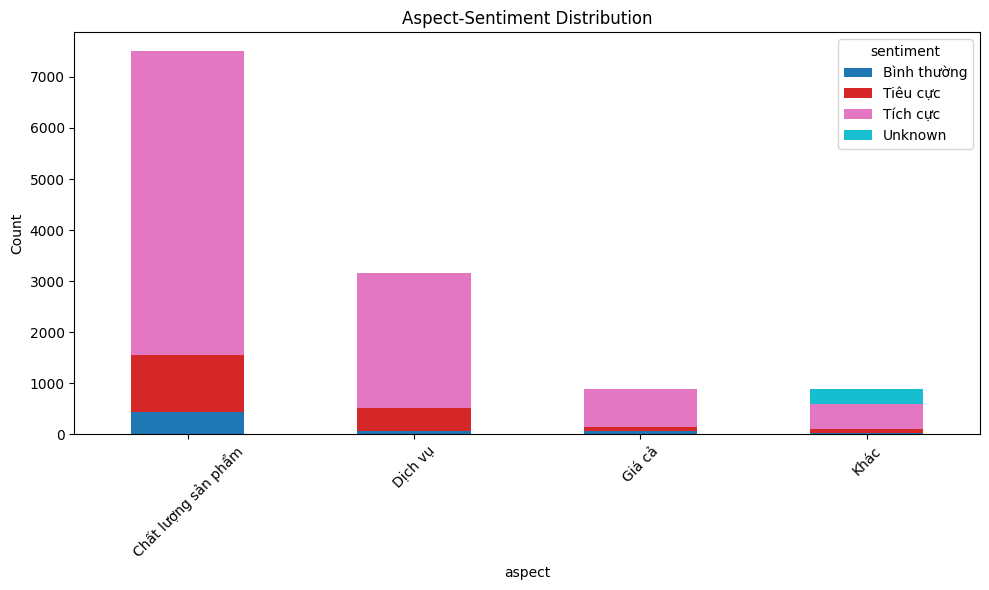

In [9]:
# 📉 Aspect-Sentiment Distribution
aspect_sentiment = pd.crosstab(df['aspect'], df['sentiment'])
aspect_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')
plt.title('Aspect-Sentiment Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

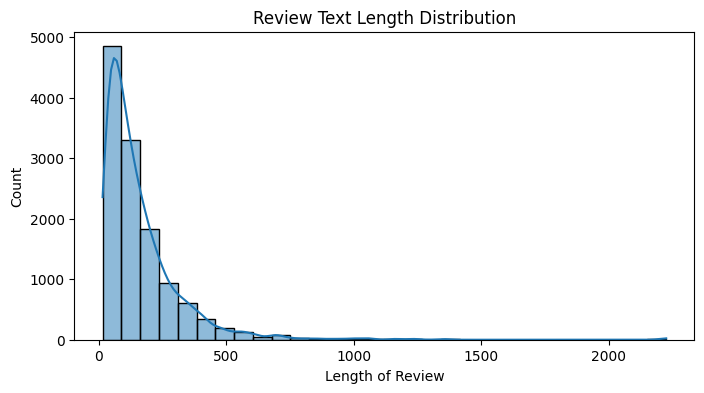

In [10]:
# 📝 Review Length Distribution
df['text_len'] = df['text'].apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(df['text_len'], bins=30, kde=True)
plt.title('Review Text Length Distribution')
plt.xlabel('Length of Review')
plt.show()

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

def wordplot(df, column='aspect', language='english'):
    text_data = ' '.join(df[column].astype(str))
    
    try:
        stop_words = set(stopwords.words(language))
    except:
        import nltk
        nltk.download('stopwords')
        stop_words = set(stopwords.words(language))
    
    wordcloud = WordCloud(
        width=1000, height=1000,
        background_color='white',
        stopwords=stop_words,
        min_font_size=10
    ).generate(text_data)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'WordCloud for column: {column}')
    plt.show()


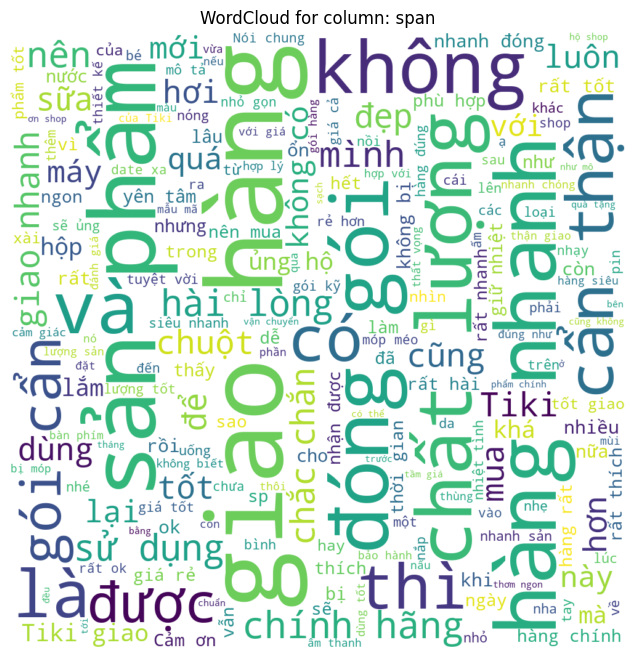

In [12]:
wordplot(df, column='span', language='english')

### Feature extraction

In [13]:
#1. Number of Words
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']]

,text,word_count
0,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,130
1,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,130
2,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,130
3,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,130
4,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,130
...,...,...
12437,Tai nghe nhẹ. Đeo cảm giác không nặng nề. Chất...,19
12438,Tai nghe nhẹ. Đeo cảm giác không nặng nề. Chất...,19
12439,"Dễ kết nối, âm thanh nghe ổn",7
12440,"Dễ kết nối, âm thanh nghe ổn",7


In [14]:
# 2. Number of characters
df['char_count'] = df['text'].str.len() ## this also includes spaces
df[['text','char_count']].head()

,text,char_count
0,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,561
1,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,561
2,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,561
3,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,561
4,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,561


In [15]:
#3. Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

,text,avg_word
0,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,3.323077
1,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,3.323077
2,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,3.323077
3,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,3.323077
4,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,3.323077


In [16]:
#4. Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
0,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,1
1,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,1
2,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,1
3,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,1
4,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,1


In [17]:
#5. Number of numerics
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['text','numerics']].head()

,text,numerics
0,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,5
1,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,5
2,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,5
3,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,5
4,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,5


In [18]:
from textblob import TextBlob
df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df

,text,aspect,sentiment,span,text_len,word_count,char_count,avg_word,stopwords,numerics,polarity,review_len
0,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,Chất lượng sản phẩm,Tích cực,Nắp cải tiến so với mẫu cũ khá tiện lợi vì chỉ...,561,130,561,3.323077,1,5,0.0,561
1,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,Chất lượng sản phẩm,Tiêu cực,Có 1 vấn đề nhỏ là nếu miếng lò xo ở nắp gãy h...,561,130,561,3.323077,1,5,0.0,561
2,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,Chất lượng sản phẩm,Tích cực,Chất lượng giữ nhiệt với mình là ổn.,561,130,561,3.323077,1,5,0.0,561
3,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,Chất lượng sản phẩm,Tiêu cực,"Vỏ ly dễ trầy xước nếu bị rơi, va đập.",561,130,561,3.323077,1,5,0.0,561
4,Mua hàng chiều ngày 06032023. Nhận hàng sáng n...,Chất lượng sản phẩm,Tích cực,"Hàng của Look Look thì đẹp, chất lượng.",561,130,561,3.323077,1,5,0.0,561
...,...,...,...,...,...,...,...,...,...,...,...,...
12437,Tai nghe nhẹ. Đeo cảm giác không nặng nề. Chất...,Chất lượng sản phẩm,Tích cực,Chất âm ổn trong tầm giá,85,19,85,3.526316,0,0,0.0,85
12438,Tai nghe nhẹ. Đeo cảm giác không nặng nề. Chất...,Chất lượng sản phẩm,Tích cực,Sạc nhanh xài lâu,85,19,85,3.526316,0,0,0.0,85
12439,"Dễ kết nối, âm thanh nghe ổn",Khác,Tích cực,Dễ kết nối,28,7,28,3.142857,0,0,0.0,28
12440,"Dễ kết nối, âm thanh nghe ổn",Chất lượng sản phẩm,Tích cực,âm thanh nghe ổn,28,7,28,3.142857,0,0,0.0,28


In [19]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Hoàn thiện cực tốt, nhấn cực êm. Lớp cao su bên rất mềm và thoải mái. Cài thêm driver nữa thì perfect!
Phải nói là ưng. Trước đó mình đặt màu đỏ nhưng lỗi kho hay sao ý, Tiki hủy đơn hàng nhưng bù lại cho mình 1 voucher giảm giá :D Vừa đặt lại màu khác cũng của Tiki Trading, giao sớm hơn 1 ngày so với dự kiến, màu đẹp hơn trong hình trên website, click êm không nghe tiếng.
Phải nói là ưng. Trước đó mình đặt màu đỏ nhưng lỗi kho hay sao ý, Tiki hủy đơn hàng nhưng bù lại cho mình 1 voucher giảm giá :D Vừa đặt lại màu khác cũng của Tiki Trading, giao sớm hơn 1 ngày so với dự kiến, màu đẹp hơn trong hình trên website, click êm không nghe tiếng.
mình mua chuột ngày 4620 đến tháng 52021 chuột bị hỏng, cụ thể là chuột trái bị lag, lúc nhận lúc không. Lúc này trong đầu nghĩ chắc hết bảo hành rồi, xong tự nhiên check lại thấy còn bảo hành 1 năm nên liên hệ tiki. Tiki hướng dẫn hỗ trợ đổi trả rất tốt.Cập nhật thông tin đổi trả qua 

In [20]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

hàng dùng tốt đạo hàng nhanh
Tiki là một thế giới rất diệu kỳ dành cho những ai đam mê mua sắm nhưng muốn mua với giá rẻ, freeship, hàng chính hãng,.... Là mọt Tiki từ rất lâu, tớ cũng u mê toàn bộ sản phẩm Tiki lắm ấy, đặc biệt là Bình Đun Siêu Tốc 2 Lớp LockandLock Trước khi đến với phần review chi tiết thì mình sẽ đánh giá sơ bộ về dịch vụ. Hàng giao khá nhanh, chỉ tầm 3 ngày là em nó đã về tay với tớ rồi. Shipper thì siêu thân thiện, dễ thương và tinh tế. Hàng nhận về được đóng gói tỉ mẩn, được bọc nhiều lớp chống sốc. Hàng mình mua trong đợt sale 22 nên săn được siêu nhiều voucher ưu đãi. Mã mình sử dụng được giảm đến tận 50k. Chưa kể còn được miễn phí toàn bộ phí vận chuyển. Kết hợp áp xu nên đơn hàng này trị giá 0 đồng. Mê tít phải không nào các bạn? Giờ mình sẽ review chi tiết em nó nhen! Bình có màu trắng đen rất sang trọng, tinh tế. Được cấu tạo 2 lớp vì vậy thành bình vô cùng chắc chắn giúp giữ ấm lâu hơn và 

In [21]:
df.polarity.min()

-0.5

In [22]:
df.loc[df.polarity == -0.5]

,text,aspect,sentiment,span,text_len,word_count,char_count,avg_word,stopwords,numerics,polarity,review_len
9964,tiki trading phân phối chính hãng nên mng yêb ...,Khác,Tích cực,yên tâm,310,74,310,3.202703,1,1,-0.5,310
9965,tiki trading phân phối chính hãng nên mng yêb ...,Chất lượng sản phẩm,Tích cực,yên tâm về chất lượng,310,74,310,3.202703,1,1,-0.5,310
9966,tiki trading phân phối chính hãng nên mng yêb ...,Giá cả,Tích cực,ngon bổ rẻ so với store bên ngoài,310,74,310,3.202703,1,1,-0.5,310


In [23]:
import plotly.express as px

fig = px.histogram(df, x='polarity', nbins=50, title='Polarity Distribution')
fig.show()


In [24]:
df.columns

Index(['text', 'aspect', 'sentiment', 'span', 'text_len', 'word_count',
       'char_count', 'avg_word', 'stopwords', 'numerics', 'polarity',
       'review_len'],
      dtype='object')

In [25]:
fig1 = px.histogram(df, x='review_len', nbins=50, title='Review Text Length Distribution')
fig1.show()


In [26]:
fig2 = px.histogram(df, x='word_count', nbins=50, title='Review Text Word Count Distribution')
fig2.show()

In [27]:
import plotly.graph_objs  as go
from plotly.offline import iplot

trace1 = go.Scatter(
    x=df['review_len'], y=df['polarity'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['review_len'], y=df['polarity'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['review_len'], name='Review length density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['polarity'], name='Polarity density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])

hàng 9716
không 7833
giao 6389
mình 6357
có 6076
rất 5611
nhanh 5508
mua 4651
là 4301
thì 4130
được 4052
tốt 4004
và 3921
sản 3920
tiki 3879
phẩm 3826
nên 3765
giá 3398
dùng 3203
nhưng 3195


In [29]:
# Lower case
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text']

0        mua hàng chiều ngày 06032023. nhận hàng sáng n...
1        mua hàng chiều ngày 06032023. nhận hàng sáng n...
2        mua hàng chiều ngày 06032023. nhận hàng sáng n...
3        mua hàng chiều ngày 06032023. nhận hàng sáng n...
4        mua hàng chiều ngày 06032023. nhận hàng sáng n...
                               ...                        
12437    tai nghe nhẹ. đeo cảm giác không nặng nề. chất...
12438    tai nghe nhẹ. đeo cảm giác không nặng nề. chất...
12439                         dễ kết nối, âm thanh nghe ổn
12440                         dễ kết nối, âm thanh nghe ổn
12441                                  oke không gì để chê
Name: text, Length: 12442, dtype: object

In [30]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])

hàng 9716
không 7833
giao 6389
mình 6357
có 6076
rất 5611
nhanh 5508
mua 4651
là 4301
thì 4130
được 4052
tốt 4004
và 3921
sản 3920
tiki 3879
phẩm 3826
nên 3765
giá 3398
dùng 3203
nhưng 3195


In [35]:
df_plot = df2.groupby('text')['count'].sum().sort_values(ascending=False).head(20)
df_plot = df_plot.reset_index()

fig3 = px.bar(df_plot, x='text', y='count', title='Top 20 words in review after removing stop words')
fig3.show()


In [36]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])

giao hàng 4265
sản phẩm 3759
hàng nhanh 2504
đóng gói 2421
chất lượng 2167
sử dụng 1635
cẩn thận 1567
hài lòng 1091
gói cẩn 1063
chính hãng 1043
không có 861
chắc chắn 840
không bị 787
giao nhanh 751
ủng hộ 740
tiki giao 697
nhận được 682
giữ nhiệt 668
thời gian 667
mình mua 632


In [37]:
df_plot1 = df3.groupby('text')['count'].sum().sort_values(ascending=False).head(20)
df_plot1 = df_plot1.reset_index()

fig4 = px.bar(df_plot, x='text', y='count', title='Top 20 bigrams in review before removing stop words')
fig4.show()

In [39]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])

giao hàng nhanh 2428
gói cẩn thận 1057
đóng gói cẩn 1021
nhanh đóng gói 533
tiki giao hàng 497
hàng chính hãng 449
rất hài lòng 442
hàng nhanh đóng 347
sẽ ủng hộ 335
nhận được hàng 298
chất lượng tốt 289
sản phẩm tốt 279
giao hàng rất 273
đóng gói kỹ 236
nói chung là 231
sản phẩm này 227
chất lượng sản 227
lượng sản phẩm 227
hàng rất nhanh 225
đã nhận được 223


In [40]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])

giao hàng nhanh 2432
gói cẩn thận 1057
đóng gói cẩn 1021
nhanh đóng gói 533
tiki giao hàng 507
hàng chính hãng 449
rất hài lòng 442
hàng nhanh đóng 347
sẽ ủng hộ 335
nhận được hàng 298
chất lượng tốt 289
sản phẩm tốt 279
giao hàng rất 273
đóng gói kỹ 236
nói chung là 231
sản phẩm này 227
chất lượng sản 227
lượng sản phẩm 227
hàng rất nhanh 225
đã nhận được 223


In [41]:
df_plot2 = df5.groupby('text')['count'].sum().sort_values(ascending=False).head(20)
df_plot2 = df_plot2.reset_index()

fig5 = px.bar(df_plot, x='text', y='count', title='Top 20 trigrams in review after removing stop words')
fig5.show()